In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline


In [26]:
#Loading DataSets

import pandas as pd

customers = pd.read_csv("DataSets/Customers.csv")
products = pd.read_csv("DataSets/Products.csv")
orders = pd.read_csv("DataSets/Orders.csv")

customers.head(), products.head(), orders.head()



(   customer_id  age  gender location
 0            1   56    Male      USA
 1            2   46  Female    India
 2            3   32  Female    India
 3            4   25  Female       UK
 4            5   38    Male      USA,
    product_id     category  price
 0           1  Electronics   4223
 1           2  Electronics   3608
 2           3      Fashion   4590
 3           4         Home   2556
 4           5         Home   3670,
    order_id  customer_id  product_id  quantity  order_date
 0         1           25          18         2  2024-12-03
 1         2           66           3         1  2024-06-17
 2         3          100           1         1  2024-10-03
 3         4           48          20         3  2024-07-13
 4         5           17           1         3  2024-01-22)

In [27]:
#DataSets Overview 

print("Customers Shape:", customers.shape)
print("Products Shape:", products.shape)
print("Orders Shape:", orders.shape)


Customers Shape: (100, 4)
Products Shape: (20, 3)
Orders Shape: (500, 5)


In [12]:
#Data Preprocessing 

orders["order_date"] = pd.to_datetime(orders["order_date"])

# Total purchase quantity per customer
customer_purchases = orders.groupby("customer_id")["quantity"].sum().reset_index()

data = customers.merge(customer_purchases, on="customer_id")
data.head()


,customer_id,age,gender,location,quantity
0,1,56,Male,USA,14
1,2,46,Female,India,12
2,3,32,Female,India,8
3,4,25,Female,UK,6
4,5,38,Male,USA,22


In [15]:
#Customer Segmentation 

from sklearn.cluster import KMeans

X = data[["age", "quantity"]]

kmeans = KMeans(n_clusters=3, random_state=42)
data["segment"] = kmeans.fit_predict(X)

data.head()



c:\Users\Apoor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,customer_id,age,gender,location,quantity,segment
0,1,56,Male,USA,14,1
1,2,46,Female,India,12,0
2,3,32,Female,India,8,2
3,4,25,Female,UK,6,2
4,5,38,Male,USA,22,0


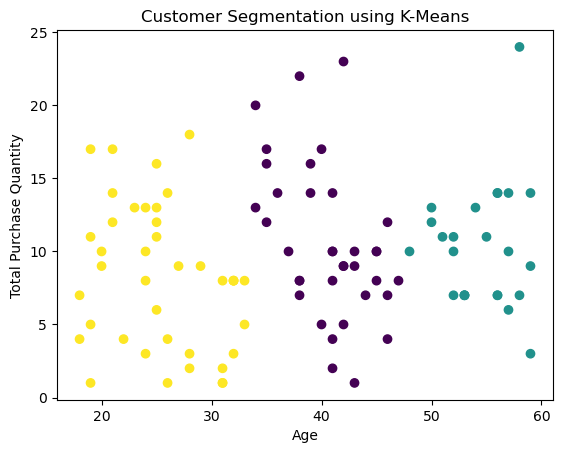

In [17]:
#Customer Segmentation Visualization

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data["age"], data["quantity"], c=data["segment"])
plt.xlabel("Age")
plt.ylabel("Total Purchase Quantity")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [18]:
#Segment Analysis 

segment_summary = data.groupby("segment").agg({
    "age": "mean",
    "quantity": "mean",
    "customer_id": "count"
}).rename(columns={"customer_id": "total_customers"})

segment_summary


,age,quantity,total_customers
segment,,,
0,40.638889,10.527778,36
1,54.625000,10.333333,24
2,25.425000,8.200000,40


In [19]:
#Purchase Pattern Analysis 

merged_data = orders.merge(products, on="product_id")

category_sales = merged_data.groupby("category")["quantity"].sum()
category_sales


category
Beauty         253
Electronics    305
Fashion        237
Home           160
Name: quantity, dtype: int64

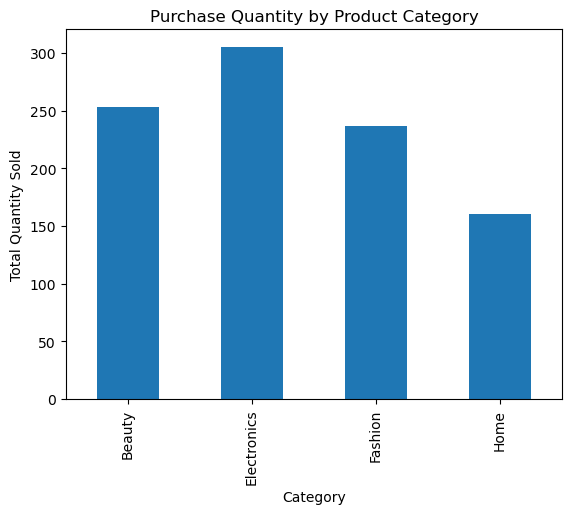

In [20]:
#Category Sales Visualization

category_sales.plot(kind="bar")
plt.title("Purchase Quantity by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.show()


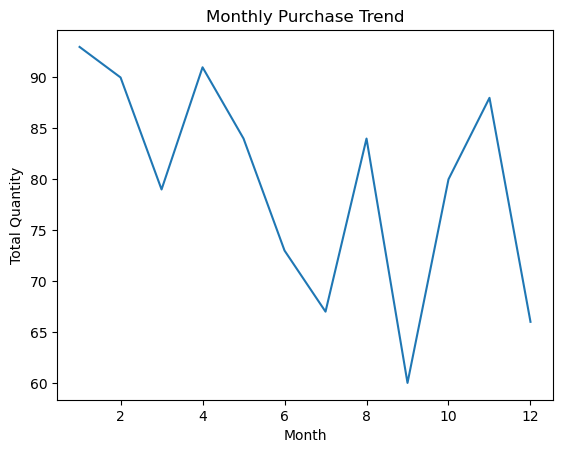

In [21]:
#Monthly Purchase Trend 

monthly_sales = orders.groupby(orders["order_date"].dt.month)["quantity"].sum()

monthly_sales.plot()
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.show()


In [22]:
#Reccomendation Insights

top_products = orders.groupby("product_id")["quantity"].sum().sort_values(ascending=False).head(5)
top_products


product_id
17    70
1     68
3     65
19    62
14    58
Name: quantity, dtype: int64

In [23]:
#Product Reccommendations

recommended_products = top_products.reset_index().merge(products, on="product_id")
recommended_products


,product_id,quantity,category,price
0,17,70,Electronics,753
1,1,68,Electronics,4223
2,3,65,Fashion,4590
3,19,62,Electronics,3057
4,14,58,Electronics,1945


In [24]:
#Key Insights 

print("Key Insights:")
print("- Customers can be segmented into 3 groups based on age and purchase behavior.")
print("- Electronics and Fashion categories show high demand.")
print("- A small set of products drives most sales (useful for recommendations).")


Key Insights:
- Customers can be segmented into 3 groups based on age and purchase behavior.
- Electronics and Fashion categories show high demand.
- A small set of products drives most sales (useful for recommendations).
